In [0]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats
from collections import Counter 
from copy import *



def chi_square(repetitions, null_activate, statistics, daughter_particles, assume_origin, dx, dy, daughter_ignore, chiovern, closest_approach): #change code if you wanna change dz too
  #define lists for chi-square (for each daughter)
  chi=[] 
  chi2=[]
  chi3=[]
  chi4=[]
  #make lists of intersection points:
  prediction_a=[]
  prediction_b=[]
  y12=[]
  y13=[]
  y14=[]
  y23=[]
  y24=[]
  y34=[]
  x12=[]
  x13=[]
  x14=[]
  x23=[]
  x24=[]
  x34=[]
  centroid_x=[]
  centroid_y=[]
  coordinates_centroid=[]
  #specify parameters
  aa=-1000 #lower edge of detector
  bb=1000 #upper edge of detector
  cc=0.1 #width of the detection cell
  #dx=0 #small displacement of the fourth particle in x direction
  #dy=0 #small displacement of the fourth particle in y direction
  degrees_of_freedom=7
  #null_activate: if you want to exclude every 1% of the measurements from chi2 calculation, choose False, else True
  #daugher_particles: 1/3/4 daughter particles that you do the exercise with
  #assume_origin: True if manually set b=0, False if let computer calculate b
  #daughter_ignore: True if you want to ignore one of the daughters in the calculation of chi2, else False
  #chiovern: if you want to display your data 


  print("Simulation run for: ", daughter_particles, " particle(s) for: ", repetitions, " repetition(s).")

  #define detection cells of the detector
  detectorX=np.arange(aa,bb,cc) #list for x axis of detector
  detectorY=np.arange(aa,bb,cc) #list for y axis of detector

  for p in range(daughter_particles):
    for k in range(repetitions): #for every particle we track (one at the time):
      # Data for a three-dimensional line (3D location of a particle)
      if p==0 or p==1 or p==2:
        zline = np.linspace(0, 10, 80) #create z axis
        xline=zline*np.tan(random.randint(0,90)) #for every z, there exist such x, y based on a random initial angle
        yline=zline*np.tan(random.randint(0,90))
      if p==3:
        zline = np.linspace(0, 10, 80) #create z axis
        xline=dx+zline*np.tan(random.randint(0,90)) #for every z, there exist such x, y based on a random initial angle
        yline=dy+zline*np.tan(random.randint(0,90))

      #get 3D location of a particle for only 8 detection points
      number=int(len(zline)/8.5) #to get 8 detection points, excludig 0 start (which we will later substract)
      XdetPoints=xline[::number]
      YdetPoints=yline[::number]
      ZdetPoints=zline[::number]

      #make arrays into lists so you can use list tools (like .pop()/.remove()...)
      ZdetPoints=list(ZdetPoints)
      YdetPoints=list(YdetPoints)
      XdetPoints=list(XdetPoints)

      XdetPoints.remove(XdetPoints[0])
      YdetPoints.pop(0)
      ZdetPoints.pop(0)

      if repetitions==1:
        print("")
        print("Actual points where the particle ended:")
        print("z points",ZdetPoints)
        print("y points:",YdetPoints)
        print("x points:",XdetPoints)
      if repetitions!=1:
        pass

      #detected points lists (error of non-infinetelisimal detection cells)
      x_cell_size_error_incl=[]
      y_cell_size_error_incl=[]


      """which cells detect the particle:"""
      m=0
      for m in range(len(XdetPoints)): #for every element in x values for detected particles
        j=0
        for j in range(len(detectorX)): #for every possible detection cell
          if j<(len(detectorX)-1): #except for the last detection cell (out of range error)
            if detectorX[j]<=XdetPoints[m]<detectorX[j+1]: #if the value of the detected points is between the value of jth and j+1th element of detection cell
              x_cell_size_error_incl.append((detectorX[j]+detectorX[j+1])/2) #set this detector cell as the cell that detected the particle
      else:
        pass

      m=0
      for m in range(len(YdetPoints)): #for every element in y values for detected particles
        j=0
        for j in range(len(detectorY)): #for every point in the detection cells
          if j<(len(detectorY)-1): #except for the last detection cell
            if detectorY[j]<=YdetPoints[m]<detectorY[j+1]: #if the value of the detected points is between the value of jth and j+1th element of detection cells
              y_cell_size_error_incl.append((detectorY[j]+detectorY[j+1])/2)
      else:
        pass

      if repetitions==1:
        print("")
        print("Detector cells that would ideally detect the particles, given the non-infinetelisimal nature of detector cells:")
        print("x cells: ", x_cell_size_error_incl)
        print("y cells: ", y_cell_size_error_incl)
      if repetitions!=1:
        pass

      """
      add a small probability (10% maybe) that it is found in an
      adjacent pixel (there are 8 adjacent pixels) – pick one randomly. Record that as the
      coordinate and then move to the next detector layer.
      """

      #only consider cases where a particle lands on every detector (if it happens for instance to have the initial angle of 89 degrees or so wrt z axis, then it will not hit the detector)
      if len(y_cell_size_error_incl)==len(x_cell_size_error_incl)==8: 

        #each elemenet of detected x,y values gets a random number 0-1
        probX=[]
        for m in x_cell_size_error_incl:
          probX.append(random.random())
        #print(probX) 
        probY=[]
        for m in y_cell_size_error_incl:
          probY.append(random.random())
        #print(probY) 

        #lists of final detected locations of each particle (incl prob that it is found in an adjacent pixel)
        x_measured=[]
        y_measured=[]

        #probability that it is detected in the detected pixel, prob that it is detected in any 8 of the adjacent pixels...
        i=0
        for i in range(len(probX)):
          if 0<=probX[i]<0.0375:
            x_measured.append(x_cell_size_error_incl[i]-cc)
          if 0.0375<=probX[i]<0.075:
            x_measured.append(x_cell_size_error_incl[i]+cc)
          if 0.075<=probX[i]:
            x_measured.append(x_cell_size_error_incl[i])

        i=0
        for i in range(len(probY)):
          if 0<=probY[i]<0.0375:
            y_measured.append(y_cell_size_error_incl[i]-0.25)
          if 0.0375<=probY[i]<0.075:
            y_measured.append(y_cell_size_error_incl[i]+0.25)
          if 0.075<=probY[i]:
            y_measured.append(y_cell_size_error_incl[i])
        

        

        if repetitions==1:
          print("")
          print("measured x (probs incl): ", x_measured)
          print("measured y (probs incl): ", y_measured)
        if repetitions!=1:
          pass

        """
        Use the information from the slides linked to calculate the 𝜒
        2 value for your track fit
        compared to your data. We expect this to not be perfect – we added some
        imperfection in there. If the imperfection is not good enough, you can increase the
        probabilities discussed.
        """
        sigma=[cc**2]*len(y_measured)

        Alist=[]
        Blist=[]
        Clist=[]
        Dlist=[]
        Elist=[]
        Flist=[]

        for i in range(len(sigma)):
          Alist.append(y_measured[i]/sigma[i])
          Blist.append(1/sigma[i])
          Clist.append(x_measured[i]/sigma[i])
          Dlist.append((y_measured[i]**2)/sigma[i])
          Elist.append((x_measured[i]*y_measured[i])/sigma[i])
          Flist.append((x_measured[i]**2)/sigma[i])
        A=sum(Alist)
        B=sum(Blist)
        C=sum(Clist)
        D=sum(Dlist)
        E=sum(Elist)
        F=sum(Flist)
        #print(A, B, C, D, E, F)

        a=(E*B-C*A)/(D*B-A*A)
        if assume_origin==False:
          b=(D*C-E*A)/(B*D-A*A)
        if assume_origin==True:
          b=0
        #add to lists a,b
        prediction_a.append(a)
        prediction_b.append(b)

        if repetitions==1:
          print("")
          print("Prediction: x=", round(a,4),"*y + ", round(b,4))
          print("")
        if repetitions!=1:
          pass

        #predicted x values based on the formula deduced from datapoints
        linear_fit=[]

        for i in range(len(y_measured)):
          #print(y_measured[i])
          linear_fit.append(a*y_measured[i]+b)
        #print(linear_fit)

        #finally find chi
        ChiList=[]
        for i in range(len(sigma)):
          h=(x_measured[i]-a*y_measured[i]-b)**2/sigma[i]
          ChiList.append(h)

        if p==0:
          chi.append(sum(ChiList))
        if daughter_particles==3 or daughter_particles==4:
          if p==1:
            chi2.append(sum(ChiList))
          if p==2:
            chi3.append(sum(ChiList))
        if daughter_particles==4:
          if p==3:
            chi4.append(sum(ChiList))

      #escaped particles have "False" on their repetition spot in prediction_a/b lists
      if len(y_cell_size_error_incl)!=8 or len(x_cell_size_error_incl)!=8:
        prediction_a.append("False")
        prediction_b.append("False")


    #you've gathered all repetitions for a certain daughter particle
    chi = [x for x in chi if str(x) != 'nan'] #remove infinities
    if daughter_particles==3 or daughter_particles==4:
       chi2 = [x for x in chi2 if str(x) != 'nan']
       chi3 = [x for x in chi3 if str(x) != 'nan']
    if daughter_particles==4:
       chi4 = [x for x in chi4 if str(x) != 'nan']

  
  #leave out 1 percent
  if daughter_particles==1:
    if null_activate==True:
      probsnull=[]
      for i in range(len(ChiList)):
        probsnull.append(random.random())
      for i in range(len(probsnull)):
        if probsnull[i]<0.01:
          chi.remove(chi[i])

  if chiovern==True:
    chi = [number / degrees_of_freedom for number in chi]
    chi2 = [number / degrees_of_freedom for number in chi2]
    chi3 = [number / degrees_of_freedom for number in chi3]
    chi4 = [number / degrees_of_freedom for number in chi4]

  #find which repetitons are missed:
 
  g=int(len(prediction_a)/daughter_particles)
  #missed locations for each daughter
  missed_loc1 = [ i for i in range(g) if prediction_a[i] == 'False' ]
  if daughter_particles>=2:
    missed_loc2 = [ i-g for i in range(g, 2*g) if prediction_a[i] == 'False' ]
    if daughter_particles>=3:    
        missed_loc3 = [ i-2*g for i in range(2*g, 3*g) if prediction_a[i] == 'False' ]
        if daughter_particles==4:
          missed_loc4 = [ i-3*g for i in range(3*g, 4*g) if prediction_a[i] == 'False' ]

  if daughter_particles==1:
    missed_loc=missed_loc1
  if daughter_particles==2:
    missed_loc=missed_loc1+missed_loc2
  if daughter_particles==3:
    missed_loc=missed_loc1+missed_loc2+missed_loc3  
  if daughter_particles==4:
    missed_loc=missed_loc1+missed_loc2+missed_loc3+missed_loc4
  missed_loc.sort(reverse = True)
  missed_loc = list(dict.fromkeys(missed_loc))


  #now remove these repetitions from prediction_a, prediction_b:
  new_prediction_a=deepcopy(prediction_a, memo=None, _nil=[])
  new_prediction_b=deepcopy(prediction_b, memo=None, _nil=[])
  for i in missed_loc:
    if daughter_particles==4:
      new_prediction_a.remove(prediction_a[(3*g)+i])
      new_prediction_b.remove(prediction_b[(3*g)+i])
    if daughter_particles==4 or daughter_particles==3:
      new_prediction_a.remove(prediction_a[(2*g)+i])
      new_prediction_b.remove(prediction_b[(2*g)+i])
    if daughter_particles==4 or daughter_particles==3 or daughter_particles==2:    
      new_prediction_a.remove(prediction_a[(g)+i])
      new_prediction_b.remove(prediction_b[(g)+i])
    if daughter_particles==4 or daughter_particles==3 or daughter_particles==2 or daughter_particles==1:      
      new_prediction_a.remove(prediction_a[i])
      new_prediction_b.remove(prediction_b[i])

  prediction_a=new_prediction_a
  prediction_b=new_prediction_b
  repetitions=repetitions-len(missed_loc)


  #remove a particle

  realpa=deepcopy(prediction_a, memo=None, _nil=[])
  realpb=deepcopy(prediction_b, memo=None, _nil=[])
  pa=deepcopy(prediction_a, memo=None, _nil=[])
  pb=deepcopy(prediction_b, memo=None, _nil=[])
  realchi=deepcopy(chi, memo=None, _nil=[])
  realchi2=deepcopy(chi2, memo=None, _nil=[])
  realchi3=deepcopy(chi3, memo=None, _nil=[])
  realchi4=deepcopy(chi4, memo=None, _nil=[])
  j=0
  while j<=4:
    prediction_a=realpa
    prediction_b=realpb
    print("")
    y12=[]
    y13=[]
    y14=[]
    y23=[]
    y24=[]
    y34=[]
    x12=[]
    x13=[]
    x14=[]
    x23=[]
    x24=[]
    x34=[]
    if j==0:
      pass
    if j==1:
      print("Particle 1 ignored:")
      pa=prediction_a[repetitions:]
      pb=prediction_b[repetitions:]
      #chi=[]
      prediction_a=pa
      prediction_b=pb
      daughter_particles=3
      centroid_x=[]
      centroid_y=[]
      coordinates_centroid=[]
    if j==2:
      print("Particle 2 ignored:")
      pa=prediction_a[:repetitions] +prediction_a[repetitions*2:]
      pa=prediction_a[:repetitions] +prediction_a[repetitions*2:]
      #chi2=[]
      prediction_a=pa
      prediction_b=pb
      daughter_particles=3
      centroid_x=[]
      centroid_y=[]
      coordinates_centroid=[]
    if j==3:  
      print("Particle 3 ignored:")
      pa=prediction_a[:2*repetitions] +prediction_a[repetitions*3:]
      pa=prediction_a[:2*repetitions] +prediction_a[repetitions*3:]
      #chi3=[] 
      prediction_a=pa
      prediction_b=pb 
      daughter_particles=3
      centroid_x=[]
      centroid_y=[]
      coordinates_centroid=[]
    if j==4:
      print("Particle 4 ignored:")
      pa=prediction_a[:3*repetitions]
      pb=prediction_b[:3*repetitions]
      #chi4=[]
      prediction_a=pa
      prediction_b=pb 
      daughter_particles=3 
      centroid_x=[]
      centroid_y=[]
      coordinates_centroid=[] 

    p1="Chi-square, daughter 1:", chi
    p2="Chi-square, daughter 2: ", chi2
    p3="Chi-square, daughter 3: ", chi3
    p4="Chi-square, daughter 4: ", chi4
    if j==0:
      print(p1)
      print(p2)
      print(p3)
      print(p4)
    if j==1:
      print(p2)
      print(p3)
      print(p4)
    if j==2:
      print(p1)
      print(p3)
      print(p4)
    if j==3:
      print(p1)
      print(p2)
      print(p4)
    if j==4:
      print(p1)
      print(p2)
      print(p3)          

  #find cross points
  #you need to do it once you already have equations for all the particle trajectories (after repetitions and daughters loop)

    for i in range(repetitions):
      if daughter_particles>=2:
        y12.append((prediction_b[(repetitions-1)+i]-prediction_b[i])/(prediction_a[i]-prediction_a[(repetitions-1)+i])) #for each repetition, (second daughter's b-first daughter's b)/(first daughter's a - second daughter's a)
        if daughter_particles>=3:
          y13.append((prediction_b[(repetitions*2-1)+i]-prediction_b[i])/(prediction_a[i]-prediction_a[(repetitions*2-1)+i]))
          y23.append((prediction_b[repetitions*2-1+i]-prediction_b[repetitions-1+i])/(prediction_a[repetitions-1+i]-prediction_a[repetitions*2-1+i]))
          if daughter_particles==4:
            y14.append((prediction_b[3*repetitions-1+i]-prediction_b[i])/(prediction_a[i]-prediction_a[repetitions*3-1+i]))
            y24.append((prediction_b[3*repetitions-1+i]-prediction_b[repetitions-1+i])/(prediction_a[repetitions-1+i]-prediction_a[3*repetitions-1+i]))
            y34.append((prediction_b[3*repetitions-1+i]-prediction_b[2*repetitions-1+i])/(prediction_a[2*repetitions-1+i]-prediction_a[3*repetitions-1+i]))

          #what do I end up with:
          #y12=[rep1, rep2,rep3,...rep=rep]     this makes sense because we are calculating intersection points for each repetition, so we get 1 y12 value per repetition


      #find x values correcponding to these y values 
      #again, for every repetition
    for i in range(repetitions):
      if daughter_particles>=2:
        x12.append(prediction_a[i]*y12[i] + prediction_b[i])
        if daughter_particles>=3:
          x13.append(prediction_a[i]*y13[i] + prediction_b[i])
          x23.append(prediction_a[repetitions-1+i]*y23[i] + prediction_b[repetitions-1+i])
          if daughter_particles==4:
            x14.append(prediction_a[i]*y14[i] + prediction_b[i])
            x24.append(prediction_a[repetitions-1+i]*y24[i] + prediction_b[repetitions-1+i])
            x34.append(prediction_a[2*repetitions-1+i]*y34[i] + prediction_b[2*repetitions-1+i])


    #find centroid of these points
    for i in range(repetitions):
      if daughter_particles==2:
        centroid_x.append(x12[i])
        centroid_y.append(y12[i])

      if daughter_particles==3:
        centroid_x.append((x12[i]+x13[i]+x23[i])/3)
        centroid_y.append((y12[i]+y13[i]+y23[i])/3)

      if daughter_particles==4:
        centroid_x.append((x12[i]+x13[i]+x14[i]+x23[i]+x24[i]+x34[i])/6)
        centroid_y.append((y12[i]+y13[i]+y14[i]+y23[i]+y24[i]+y34[i])/6)

    for i in range(len(centroid_x)):
      coordinates_centroid.append([centroid_x[i], centroid_y[i]])

    if closest_approach==True:
      if 2<=daughter_particles<=4:
        print("The decay points (y,x) are : (",coordinates_centroid,")." )
        plt.scatter(centroid_y,centroid_x)
        plt.title("The Points Of The Closest Approach")
        plt.show()
      if daughter_particles==1 or daughter_particles>4:
        pass


    #plotting graphs
    if repetitions==1:
      plt.plot(y_measured, linear_fit, "blue", label="prediction") #make graph
      plt.plot(y_measured, x_measured, "red", label="detection")#make graph of actual particle
      plt.legend(loc="lower right")
      plt.title("Detection vs Prediction")
      plt.show()
    if repetitions!=1:
      plt.hist(chi, color="blue", label="daughter 1")
      if daughter_particles==3 or daughter_particles==4:
        plt.hist(chi2, color="green", label="daughter 2")
        plt.hist(chi3, color="purple", label="daughter 3")
      if daughter_particles==4:
        plt.hist(chi, color="gold", label="daughter 4")
      plt.title("full histogram")
      plt.legend(loc="upper right")
      plt.show()

    if statistics==True:
      print("")
      print("Statistics for Daughter 1")
      print("mean: {}" .format(np.mean(chi)))
      print("variance: {}" .format(np.var(chi)))
      print("skewness: {}" .format(skew(chi)))
      print("kurtosis: {}" .format(kurtosis(chi)))
      if daughter_particles==3 or daughter_particles==4:
        print("")
        print("Statistics for Daughter 2")
        print("mean: {}" .format(np.mean(chi2)))
        print("variance: {}" .format(np.var(chi2)))
        print("skewness: {}" .format(skew(chi2)))
        print("kurtosis: {}" .format(kurtosis(chi2)))
        print("")
        print("Statistics for Daughter 3")
        print("mean: {}" .format(np.mean(chi3)))
        print("variance: {}" .format(np.var(chi3)))
        print("skewness: {}" .format(skew(chi3)))
        print("kurtosis: {}" .format(kurtosis(chi3)))
      if daughter_particles==4:
        print("")
        print("Statistics for Daughter 4")
        print("mean: {}" .format(np.mean(chi4)))
        print("variance: {}" .format(np.var(chi4)))
        print("skewness: {}" .format(skew(chi4)))
        print("kurtosis: {}" .format(kurtosis(chi4)))
    
    chi=realchi
    chi2=realchi2
    chi3=realchi3
    chi4=realchi4

    if daughter_ignore==True:    
      j+=1
    if daughter_ignore==False:
      break


Simulation run for:  1  particle(s) for:  1  repetition(s).

Actual points where the particle ended:
z points [1.139240506329114, 2.278481012658228, 3.417721518987342, 4.556962025316456, 5.69620253164557, 6.835443037974684, 7.974683544303798, 9.113924050632912]
y points: [0.5646959238774939, 1.1293918477549878, 1.694087771632482, 2.2587836955099756, 2.8234796193874696, 3.388175543264964, 3.9528714671424576, 4.517567391019951]
x points: [0.5646959238774939, 1.1293918477549878, 1.694087771632482, 2.2587836955099756, 2.8234796193874696, 3.388175543264964, 3.9528714671424576, 4.517567391019951]

Detector cells that would ideally detect the particles, given the non-infinetelisimal nature of detector cells:
x cells:  [0.5500000002274987, 1.1500000002276352, 1.6500000002277488, 2.2500000002278853, 2.8500000002280217, 3.3500000002281354, 3.950000000228272, 4.550000000228408]
y cells:  [0.5500000002274987, 1.1500000002276352, 1.6500000002277488, 2.2500000002278853, 2.8500000002280217, 3.3500000

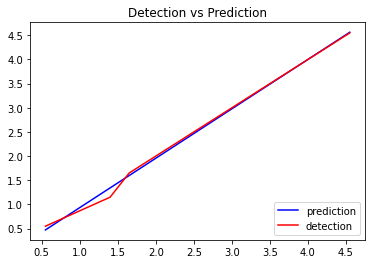

In [81]:
#demonstration
#just plot 1 particle 1 repetition, nothing else, show paths
chi_square(repetitions=1, null_activate=False, statistics=False, daughter_particles=1, assume_origin=False, dx=0, dy=0, daughter_ignore=False, chiovern=False, closest_approach=False)

Simulation run for:  1  particle(s) for:  1000  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars



('Chi-square, daughter 1:', [0.4930266602857977, 0.41782031574607215, 2.336467095497747, 0.7362350066347997, 2.239088480848264, 0.4288946373074298, 14.341587980284112, 2.599268469304178, 0.7716963817517921, 0.47619047619069876, 0.5833333333335985, 1.9761904761904794, 0.6190476190479004, 0.036336109008343644, 0.9148593608235464, 46.539682539701424, 1.9761904761907796, 0.5357142857144152, 8.79088785046956, 2.9819430790098895, 0.6420301710045342, 0.6190476190474633, 0.5251340695259975, 5848.849467617425, 16.92026066030363, 36.0000000000141, 0.9024619891202181, 3.3162311159260383, 0.5833333333335984, 2.0611456339227746e-26, 3.099923246943504, 4.704902396225533, 4.577165685451498, 1.7860086767899026, 4.148739818136866, 3.813530770712287, 0.4761904761906946, 0.38038010446673143, 1394.8727927928908, 1.5404662026153635, 1.0991672975023925, 1.7261904761907911, 3.7658839779014666, 423.6814458934331, 1.433473330533726, 0.6190476190479011, 4.185329439455491, 9.673247496424116, 3.290665271487044, 

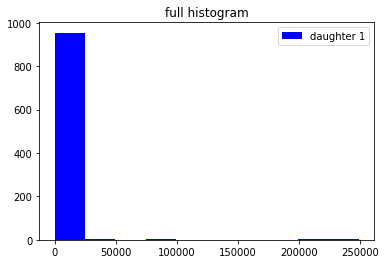


Statistics for Daughter 1
mean: 2407.4006400531
variance: 388158298.54028666
skewness: 10.149659915207108
kurtosis: 107.92323313713601


In [60]:
#task 2: A
#just calculate chi-2 for 1 particle for multiple repetitions, plot histogram
chi_square(repetitions=1000, null_activate=False, statistics=True, daughter_particles=1, assume_origin=False, dx=0, dy=0, daughter_ignore=False, chiovern=False, closest_approach=False)

Simulation run for:  1  particle(s) for:  1000  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:237: RuntimeWarning: invalid value encountered in double_scalars



('Chi-square, daughter 1:', [0.537501764075533, 0.5357142857145264, 4.083090036579568, 114.22442874420416, 0.4930094956341391, 2.1569547176619333, 5.384615384616711, 308.42953865534616, 1.0725208175629435, 15.84773662552162, 3761.401580213006, 4571.163358778558, 1.0768676512578919, 926.9563591023, 0.9177228742235192, 0.47619047619070165, 32.79549393414226, 1.122323509394539, 0.43882968000343553, 0.1967386780675097, 0.535714285714529, 347.69014605291085, 10.379125095932377, 6.6192317640972425, 0.019156823467114167, 1.3036040747876967, 49.14311124286889, 3414.3211158448426, 0.8459320221624734, 2.154761904762373, 1937.1588096374057, 192.42519814981043, 1629.1181505559346, 122.00773016445898, 2985.9487179500757, 2.9289794204124693, 105.9295315682747, 1.1226837919959771, 6166.981132077471, 0.5318924353563423, 3.145949107926355, 2.4456327985750796, 0.5432474631073468, 2375.487179488268, 0.429832543031769, 4.429638872090642e-31, 0.47619047619069055, 0.4761904761906838, 0.858042441205058, 0.6

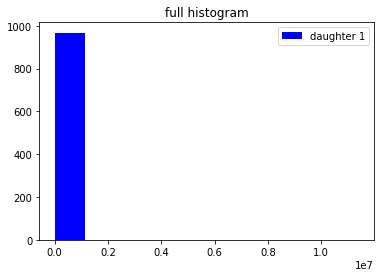


Statistics for Daughter 1
mean: 23844.284479682225
variance: 191828732288.83215
skewness: 22.97701601268624
kurtosis: 549.0882903577248


In [61]:
#task 2: B
#same as 2A, just null_activate=True & compare Chi-2 distributions
#compare 2A&2B
chi_square(repetitions=1000, null_activate=True, statistics=True, daughter_particles=1, assume_origin=False, dx=0, dy=0, daughter_ignore=False, chiovern=False, closest_approach=False)

Simulation run for:  1  particle(s) for:  1000  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars



('Chi-square, daughter 1:', [0.47292014107247404, 41.53797025372183, 1.873158379374704, 1537.9833184874644, 0.6769341944810787, 1.1807660336340593, 1.0842781507416208, 11.384773662557388, 14.439226519343057, 2.869047619047618, 31.126134836825695, 0.8969119843514277, 26.412127934312018, 1.4377320789283168, 14813.691977441798, 0.6584005761676687, 3.5735171295357753, 27.37430167599014, 9.629649721936178e-31, 3.290412791386704e-27, 137.20634920641157, 24.88601532568116, 23.429125973838993, 1.0183048345779755, 6.2074660244272755, 1.7334490991976468, 2.4565987474142825, 2.6368476714930864, 4.687073938124269, 9.405598821300982, 4.064841498559541, 5.690773485295442, 1.8741286034159557, 6.91903906302043, 13.830735892184675, 0.5357142857145223, 1.789827542539589, 356.9545154912254, 15050.000000176444, 0.5773419480834256, 1.8471281348018145, 2029.206349207265, 2.1047716328620845, 1.1190476190478615, 38.66576698157379, 1.058934300460405, 93.33439058152717, 2.9110811050121495, 3252.348684212235, 1

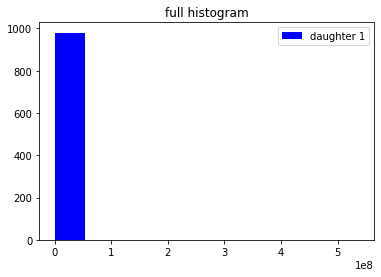


Statistics for Daughter 1
mean: 560372.9482025405
variance: 294085312452577.44
skewness: 31.265999270625322
kurtosis: 975.706921121646


In [73]:
#task 2: B
#same as 2A, just null_activate=True & compare Chi-2 distributions
#compare 2A&2B
chi_square(repetitions=1000, null_activate=True, statistics=True, daughter_particles=1, assume_origin=False, dx=0, dy=0, daughter_ignore=False, chiovern=False, closest_approach=False)

Simulation run for:  3  particle(s) for:  100  repetition(s).

('Chi-square, daughter 1:', [0.4130551096843888, 5.700352282934041, 1.1239667915176852, 3.6925581315666864, 68.78684667196922, 15034.000000185606, 1314.4656238263242, 0.6190476190479969, 0.5530836830023892, 6.189655172416316, 0.502807340987407, 2.6591740016892436, 1.5703150804158434, 551.6646902868833, 1.8654976993732175, 0.5072187242351296, 1.9882179675994098, 332.65459951031573, 34.630080522346695, 0.4761904761906956, 11412.451247166298, 0.8190803609801763, 0.5948375164222689, 2.389173873910697e-26, 1.6789859409188252, 25.733869061689777, 0.5357142857145322, 0.8283297930442303, 0.03650197405142014, 1.7261904761907938, 202.1030927835994, 6.105324982941292, 1850.920640670731, 0.8703422436360118, 32.84696261683727, 1.1566396405058081, 101.8667245496498, 1.9606791778377337, 0.5440346105520106, 1.0594277329425323, 11.274792643346338, 86.2771562669571, 0.5582303131162392, 2.2295595841391793, 1.7245034843920983, 3.93546856465022

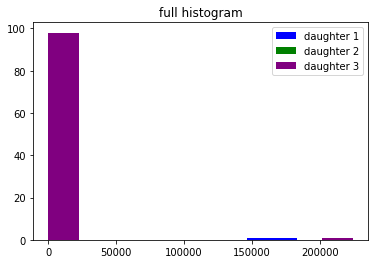


Statistics for Daughter 1
mean: 4058.207032818843
variance: 566215273.9130683
skewness: 6.787136005736619
kurtosis: 44.93944972717263

Statistics for Daughter 2
mean: 432.6754524625356
variance: 6296548.226717366
skewness: 6.625878888976335
kurtosis: 42.75618418375866

Statistics for Daughter 3
mean: 2540.7191707877973
variance: 502414078.45426625
skewness: 9.768952871070232
kurtosis: 93.62347611633608


In [63]:
#task 3: A
#generate 3 particles starting from (0,0,0), get chi-square distributions
chi_square(repetitions=100, null_activate=False, statistics=True, daughter_particles=3, assume_origin=False, dx=0, dy=0, daughter_ignore=False, chiovern=False, closest_approach=False)

Simulation run for:  3  particle(s) for:  100  repetition(s).

('Chi-square, daughter 1:', [9.032110618736354, 1.6834355186432381, 14771.874908153442, 1.713556995244705, 0.6663169623201382, 27.862882843980806, 94.53038468848264, 4236.927227868295, 11.692949948292773, 0.7520860688121709, 32.5342069902125, 116.88590583657975, 1.3455624306637004, 0.9201618285927267, 149.2630656921294, 132331.24397257413, 142.49826918383127, 1.9999999818110152, 44.608599717426095, 1.8496255962117711, 2.4060585753263903, 3.6722793518435894, 4.821190376479811, 8.598380443370777, 2553.210867536541, 6.720055674897777, 4.01826978925725, 0.6060272249659755, 0.5253306718758276, 14.607131786469425, 2.9671932629167648, 587.9999961803886, 0.5923037950300629, 5.081505989294085, 26.645332799261904, 16.90532115345393, 2.7231633037638856, 1296.9613627801657, 2.8209040122706726, 3.5023186877124943, 6.900431096279227, 2.1225115214844688, 2.192982698422022, 16801.999897689442, 1.4590465247687332, 1.2076643845833415, 8.8612

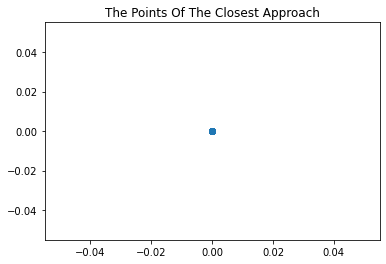

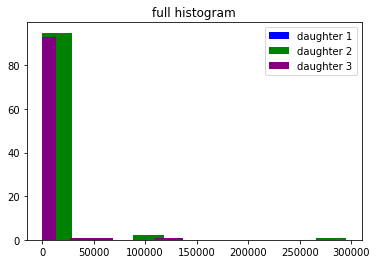


Statistics for Daughter 1
mean: 2641.3994311422175
variance: 197404644.10100797
skewness: 8.195984125629879
kurtosis: 71.43049169996274

Statistics for Daughter 2
mean: 6222.694099231795
variance: 1115650351.1989343
skewness: 7.179937206800106
kurtosis: 55.69781512295071

Statistics for Daughter 3
mean: 4268.766739456858
variance: 386380677.9669365
skewness: 5.410904045044247
kurtosis: 29.77641868305873


In [64]:
#task 3: B
#generate 3 particles starting from (0,0,0), get chi-square distributions, manually set b=0
#compare 3A&3B
chi_square(repetitions=100, null_activate=False, statistics=True, daughter_particles=3, assume_origin=True, dx=0, dy=0, daughter_ignore=False, chiovern=False, closest_approach=True)

Simulation run for:  4  particle(s) for:  50  repetition(s).

('Chi-square, daughter 1:', [0.538558071859731, 5.461935108549509, 1.3333333333314645, 75.14989109630183, 0.06621435207342778, 0.6428571428572563, 0.5357142857145265, 10.824230829125966, 2.318370844571527, 0.6154129538811479, 128.53984718096473, 694.783163265355, 67.26833367400909, 0.5725668563146066, 1.036710624372708, 0.5833333333333323, 6.638121546964099, 1053.8730158734938, 3.086945192391644, 1.9862114050521509, 6.324984213850257, 3.189684660609671, 75.22161927504006, 0.7031894366463313, 11.84044464217871, 118.52947845805639, 35.17618487574772, 1.9761904761910378, 1.5803278688531734, 1.8773946360161782, 0.5211622335526546, 0.07409834412887292, 29116.572181951396, 0.8762898590191386, 35.398265245317745, 8.386515108432661, 2.009438841479413, 4.814824860968088e-31, 0.7126589643421186, 0.619047619047896, 0.5657990801725341, 129.48371007964465, 0.5501630539039533, 0.5228355109358094, 0.6190476190476534, 10977.714285719276, 1.

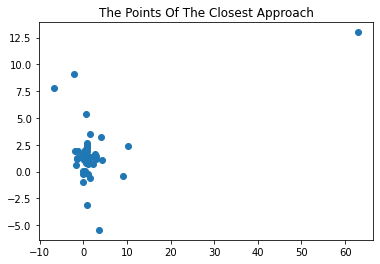

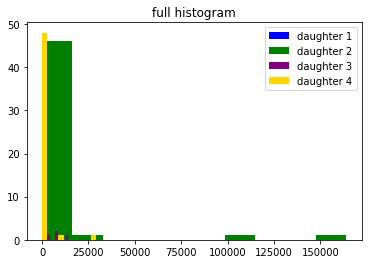


Statistics for Daughter 1
mean: 854.9601161484094
variance: 18668423.863040045
skewness: 5.847557969369697
kurtosis: 34.214100421561774

Statistics for Daughter 2
mean: 6034.385326758838
variance: 733677377.634375
skewness: 4.934282374145423
kurtosis: 23.768318715930825

Statistics for Daughter 3
mean: 987.6032073034767
variance: 8039190.6005612835
skewness: 3.2650103731014157
kurtosis: 10.135537985356777

Statistics for Daughter 4
mean: 116980.82803136737
variance: 656603972867.4016
skewness: 6.78386559787444
kurtosis: 44.02083275696697


In [70]:
#task 3: C
#introduce the fourth particle, coming some distance away from the origin
#find the point of closest approach
chi_square(repetitions=50, null_activate=False, statistics=True, daughter_particles=4, assume_origin=False, dx=3, dy=2, daughter_ignore=False, chiovern=False, closest_approach=True)

Simulation run for:  4  particle(s) for:  50  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:237: RuntimeWarning: invalid value encountered in double_scalars



('Chi-square, daughter 1:', [4443828.0000272775, 3.955174686883786, 0.1082642872318329, 0.5833333333333379, 1.6820619677966488, 0.09574095573644663, 0.9069749030165547, 0.0007742317217051373, 7.456310299615239, 0.8690476190476188, 8.192342435363948, 199.16998468605055, 1.5833865181818507, 1.7049911956251185, 0.8116514566873152, 156.7283131383632, 0.6702614459920392, 14.30314666751848, 0.5357142857145238, 0.1237011380505262, 45.603128701833604, 1.7261904761907785, 14.146886950815114, 0.41141120397891495, 8.38679969301678, 0.9492790776527205, 1.1951044875531673, 113.20408163270447, 6.0613557644757385, 2.1547619047623083, 36.59063444108819, 1596.4255265953816, 1.6496224002798663, 0.0216468237449101, 4.741834953299782, 6.90068372038198, 3.36233839235571, 0.09478305248358414, 4.2817929339798113e-26, 2.0372820204450863, 0.9014514896871936, 1.6751414312097825, 1.9277232303509415, 0.8769832484690517, 1495.3846153852953, 1.5359501100513737, 107.17678100264455])
('Chi-square, daughter 2: ', [1.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:501: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:503: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:506: RuntimeWarning: invalid value encountered in double_scalars


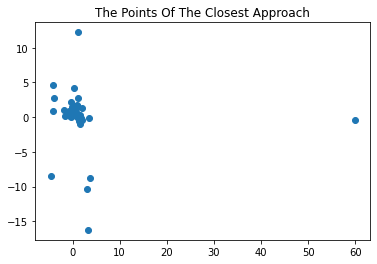

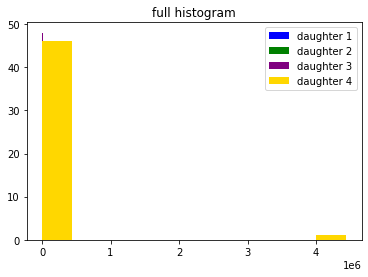


Statistics for Daughter 1
mean: 94631.54517448341
variance: 411206831749.37177
skewness: 6.634885577904831
kurtosis: 42.02171794153289

Statistics for Daughter 2
mean: 1041.2991134845086
variance: 13879725.580056297
skewness: 3.6815128183387458
kurtosis: 12.078929000322166

Statistics for Daughter 3
mean: 4228.0029077394465
variance: 718599252.1238267
skewness: 6.759872989886604
kurtosis: 43.8042402782853

Statistics for Daughter 4
mean: 722.7147711575957
variance: 8831769.654887857
skewness: 4.4914716052478765
kurtosis: 18.61851791997076

Particle 1 ignored:
('Chi-square, daughter 2: ', [1.3333333333335595, 1.4918269154492638, 0.5691516169679179, 18022.575639597482, 0.6432598228211077, 0.5774969010096478, 526.3181148750745, 15092.169921208128, 1.3783489992972475, 3.6730590572959283, 0.5254724905502328, 0.6096061928142027, 1.448392554991909, 1.025737144590142, 2.166732641912969, 390.3888070693968, 3.2273662551454856, 36.9070537305983, 0.46485442168677304, 0.9478893550082906, 0.6152186

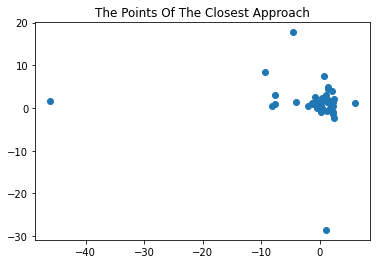

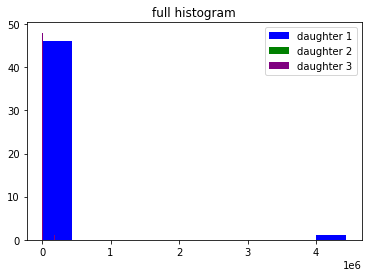


Statistics for Daughter 1
mean: 94631.54517448341
variance: 411206831749.37177
skewness: 6.634885577904831
kurtosis: 42.02171794153289

Statistics for Daughter 2
mean: 1041.2991134845086
variance: 13879725.580056297
skewness: 3.6815128183387458
kurtosis: 12.078929000322166

Statistics for Daughter 3
mean: 4228.0029077394465
variance: 718599252.1238267
skewness: 6.759872989886604
kurtosis: 43.8042402782853

Particle 2 ignored:
('Chi-square, daughter 1:', [4443828.0000272775, 3.955174686883786, 0.1082642872318329, 0.5833333333333379, 1.6820619677966488, 0.09574095573644663, 0.9069749030165547, 0.0007742317217051373, 7.456310299615239, 0.8690476190476188, 8.192342435363948, 199.16998468605055, 1.5833865181818507, 1.7049911956251185, 0.8116514566873152, 156.7283131383632, 0.6702614459920392, 14.30314666751848, 0.5357142857145238, 0.1237011380505262, 45.603128701833604, 1.7261904761907785, 14.146886950815114, 0.41141120397891495, 8.38679969301678, 0.9492790776527205, 1.1951044875531673, 11

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:527: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:529: RuntimeWarning: invalid value encountered in double_scalars


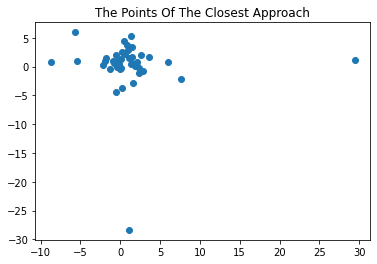

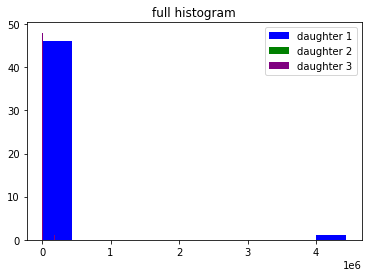


Statistics for Daughter 1
mean: 94631.54517448341
variance: 411206831749.37177
skewness: 6.634885577904831
kurtosis: 42.02171794153289

Statistics for Daughter 2
mean: 1041.2991134845086
variance: 13879725.580056297
skewness: 3.6815128183387458
kurtosis: 12.078929000322166

Statistics for Daughter 3
mean: 4228.0029077394465
variance: 718599252.1238267
skewness: 6.759872989886604
kurtosis: 43.8042402782853

Particle 3 ignored:
('Chi-square, daughter 1:', [4443828.0000272775, 3.955174686883786, 0.1082642872318329, 0.5833333333333379, 1.6820619677966488, 0.09574095573644663, 0.9069749030165547, 0.0007742317217051373, 7.456310299615239, 0.8690476190476188, 8.192342435363948, 199.16998468605055, 1.5833865181818507, 1.7049911956251185, 0.8116514566873152, 156.7283131383632, 0.6702614459920392, 14.30314666751848, 0.5357142857145238, 0.1237011380505262, 45.603128701833604, 1.7261904761907785, 14.146886950815114, 0.41141120397891495, 8.38679969301678, 0.9492790776527205, 1.1951044875531673, 11

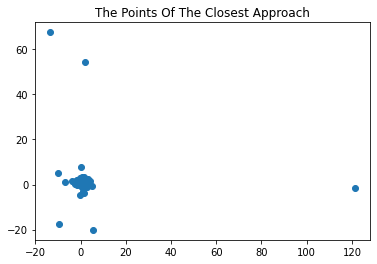

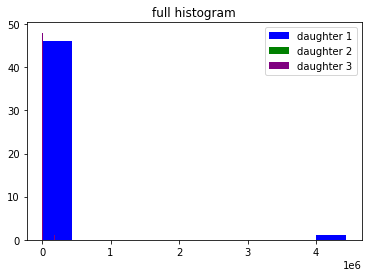


Statistics for Daughter 1
mean: 94631.54517448341
variance: 411206831749.37177
skewness: 6.634885577904831
kurtosis: 42.02171794153289

Statistics for Daughter 2
mean: 1041.2991134845086
variance: 13879725.580056297
skewness: 3.6815128183387458
kurtosis: 12.078929000322166

Statistics for Daughter 3
mean: 4228.0029077394465
variance: 718599252.1238267
skewness: 6.759872989886604
kurtosis: 43.8042402782853

Particle 4 ignored:
('Chi-square, daughter 1:', [4443828.0000272775, 3.955174686883786, 0.1082642872318329, 0.5833333333333379, 1.6820619677966488, 0.09574095573644663, 0.9069749030165547, 0.0007742317217051373, 7.456310299615239, 0.8690476190476188, 8.192342435363948, 199.16998468605055, 1.5833865181818507, 1.7049911956251185, 0.8116514566873152, 156.7283131383632, 0.6702614459920392, 14.30314666751848, 0.5357142857145238, 0.1237011380505262, 45.603128701833604, 1.7261904761907785, 14.146886950815114, 0.41141120397891495, 8.38679969301678, 0.9492790776527205, 1.1951044875531673, 11

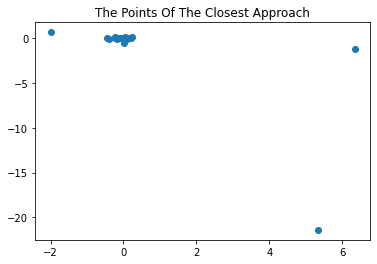

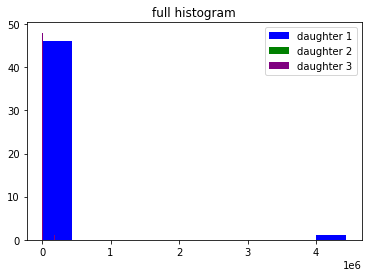


Statistics for Daughter 1
mean: 94631.54517448341
variance: 411206831749.37177
skewness: 6.634885577904831
kurtosis: 42.02171794153289

Statistics for Daughter 2
mean: 1041.2991134845086
variance: 13879725.580056297
skewness: 3.6815128183387458
kurtosis: 12.078929000322166

Statistics for Daughter 3
mean: 4228.0029077394465
variance: 718599252.1238267
skewness: 6.759872989886604
kurtosis: 43.8042402782853


In [71]:
#task 3: D
#generate 4 particles as above, but ignore 1 each run
chi_square(repetitions=50, null_activate=False, statistics=True, daughter_particles=4, assume_origin=False, dx=3, dy=2, daughter_ignore=True, chiovern=False, closest_approach=True)

In [0]:
#task 4: everything the same, plus chiovern=False

Simulation run for:  1  particle(s) for:  1000  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:237: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in double_scalars



('Chi-square, daughter 1:', [206.90276028698503, 0.3737079247283563, 0.10374149659863989, 0.2800374932341141, 0.06802721088438314, 17.847076083289448, 2.0966271587330527, 0.2297385209621244, 0.7084253413131697, 2047.2662931288876, 0.13565924553149963, 128.44444444450284, 0.04598431285904494, 0.0026136783678949176, 0.09083976672775418, 6.371760888772669, 0.0, 0.7566379985078756, 7.775641228374918, 1.6189131863536173, 0.3297365409342368, 9.20066258346638e-28, 0.04592911061940484, 0.068027210884374, 17.038082350667768, 193.04941599290257, 0.0765306122449594, 0.0055779361636220295, 0.07653061224490647, 2.2560830539644767, 0.07518353434717626, 6.354213686153336, 0.07039113059083017, 0.4772384547191782, 1.3350986675469741e-06, 0.13222602266899589, 10.03905967450244, 0.008141705799465517, 0.1173469387755766, 4.504021447723224, 0.1806791569087473, 0.21456439875572544, 2.3884632717439254, 0.46319602185544956, 0.3061224489795874, 0.07493683367899147, 0.22961931620585466, 0.21748087401980248, 0.

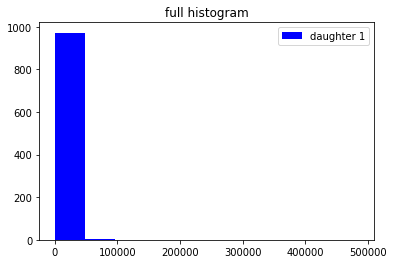


Statistics for Daughter 1
mean: 936.3737529098137
variance: 268572284.1164476
skewness: 27.027423038321903
kurtosis: 782.7926160649417


In [72]:
#task 2: A
#just calculate chi-2 for 1 particle for multiple repetitions, plot histogram
chi_square(repetitions=1000, null_activate=False, statistics=True, daughter_particles=1, assume_origin=False, dx=0, dy=0, daughter_ignore=False, chiovern=True, closest_approach=False)

Simulation run for:  1  particle(s) for:  1000  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:231: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:237: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: invalid value encountered in double_scalars



('Chi-square, daughter 1:', [22.850583090389392, 0.09872845049942154, 2.55853283149155, 406269.4256200254, 0.0202971909690119, 0.06929265796002725, 0.38665816868511393, 0.4863604947658367, 2898.570632710132, 0.028648435566244777, 5.491199529415853, 0.20413991720175093, 0.08841926180782779, 0.8994838531401378, 22.900705378759106, 0.30612244897965235, 0.5513949237175859, 179.96137026247303, 0.3069636905807447, 0.19897959183670627, 1063.7331977631472, 1.2341263892756362, 0.48091449443705486, 132.78374279651138, 2.214285714286802, 0.07653061224490278, 16.953501400567955, 54.81632653063715, 6.6551039322126275, 0.07876235506244846, 0.17857142857145883, 0.12292601339130295, 0.7774345191920514, 0.06802721088435848, 3.1818343414643544, 23.520360237526383, 0.23129251700680034, 0.08333333333334392, 0.08333333333333291, 0.25358748581512225, 2.0374732609984423, 0.12414965986394562, 23.879446054590364, 0.11580579408453553, 0.11744434320633798, 0.07673415300005533, 0.7167111487770619, 0.231516658490

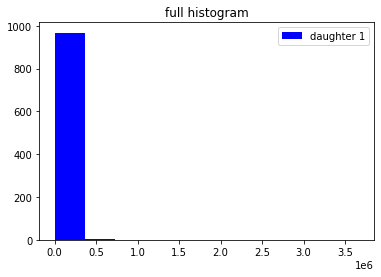


Statistics for Daughter 1
mean: 8189.6964786142
variance: 21647662774.076427
skewness: 22.04845555129202
kurtosis: 502.52487447750457


In [75]:
#task 2: B
#same as 2A, just null_activate=True & compare Chi-2 distributions
#compare 2A&2B
chi_square(repetitions=1000, null_activate=True, statistics=True, daughter_particles=1, assume_origin=False, dx=0, dy=0, daughter_ignore=False, chiovern=True, closest_approach=False)

Simulation run for:  3  particle(s) for:  100  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars



('Chi-square, daughter 1:', [0.16633791780379092, 0.06802721088438492, 0.05006797203132579, 0.06802721088438472, 0.07411253000243614, 1.1065181930472574, 1.5042277339349728, 0.35774840025227556, 0.2576010231662826, 0.22448979591840862, 1153.0745629234748, 9991.47169811701, 0.08234406070175901, 8.553054662381834, 0.09523809523813798, 0.3821294573887971, 0.2551020408163265, 1.3756642459908824e-31, 0.8806807476353483, 0.07042992794773416, 8.877280743948466, 0.09751262012431368, 0.1051594375993802, 1.0449998181095457, 0.17139519359153269, 0.8033117305966606, 5.254822836502646, 0.21088435374149575, 905.7050810015756, 0.5178586428273706, 0.1914991132456081, 153.08880933135697, 0.1037414965986559, 0.08334141922055982, 0.20952521004961056, 0.25345234113931014, 0.10374149659863684, 0.5117799805077259, 0.10629067245124164, 0.06774814999770529, 8671.142812082178, 0.5030902917419835, 2.3499148855684497, 0.23319288761696524, 1.5751755247559884, 0.09043572316880369, 1.0779479520891917, 0.0833333333

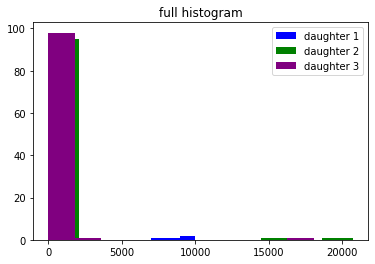


Statistics for Daughter 1
mean: 399.1901364680504
variance: 3043341.160592037
skewness: 4.665830301831532
kurtosis: 20.30595849326077

Statistics for Daughter 2
mean: 382.3816448463431
variance: 6565534.005297623
skewness: 7.019435030485113
kurtosis: 48.51072168310533

Statistics for Daughter 3
mean: 216.8208560609407
variance: 3288092.7414069967
skewness: 9.55878034179187
kurtosis: 90.89179735338848


In [77]:
#task 3: A
#generate 3 particles starting from (0,0,0), get chi-square distributions
chi_square(repetitions=100, null_activate=False, statistics=True, daughter_particles=3, assume_origin=False, dx=0, dy=0, daughter_ignore=False, chiovern=True, closest_approach=False)

Simulation run for:  3  particle(s) for:  100  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in double_scalars



('Chi-square, daughter 1:', [0.3064797335468307, 20.991137510165515, 0.5035936941906112, 0.31886723358023217, 0.08984312562530515, 0.12256543693605582, 15.726180737862014, 0.28771577812438676, 0.08853536551282004, 0.08842177031300882, 0.12805117021912502, 0.3196400850349607, 0.15966797846279873, 0.0889744942284741, 1.2280108980847706, 0.8571174532250406, 0.22440016271762228, 14.522680073674596, 2.851063834428895, 0.12020809475682444, 0.08517867990518053, 0.470443785559254, 0.8272849275960547, 0.5801482468714809, 870.4446252617848, 1.006277012192517, 2.4063855264506366, 0.4199633271192566, 0.4038993350896973, 0.12910802320861176, 0.31520199821502165, 0.11606818098932419, 0.2884384809617256, 0.25122867795657944, 0.09597237207148704, 0.7892419490554975, 43.3273510038785, 0.43715349146283433, 0.26481619331139605, 0.06653492897678703, 0.8891581343144591, 3938550.571421764, 12.647515394876935, 4.637497151175203, 0.1331494941238023, 0.23861337739901037, 1.1259449229489444, 3.966371908875614,

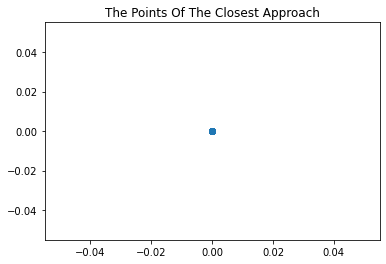

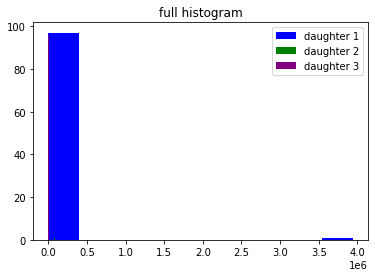


Statistics for Daughter 1
mean: 44605.07539221433
variance: 157731115208.43018
skewness: 9.621942572526581
kurtosis: 91.30200275916253

Statistics for Daughter 2
mean: 1395.6638334214424
variance: 92977144.49969348
skewness: 7.5185681163361116
kurtosis: 57.24343181041978

Statistics for Daughter 3
mean: 1016.6460702356985
variance: 61644999.326040946
skewness: 9.378222898503996
kurtosis: 87.89239039129517


In [76]:
#task 3: B
#generate 3 particles starting from (0,0,0), get chi-square distributions, manually set b=0
#compare 3A&3B
chi_square(repetitions=100, null_activate=False, statistics=True, daughter_particles=3, assume_origin=True, dx=0, dy=0, daughter_ignore=False, chiovern=True, closest_approach=True)

Simulation run for:  4  particle(s) for:  50  repetition(s).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:210: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:212: RuntimeWarning: divide by zero encountered in double_scalars



('Chi-square, daughter 1:', [0.2823129251701215, 0.19366093997279427, 0.1836748709510603, 8.804251174341648e-32, 3.4019626537656125e-28, 0.6120799168495487, 76.12244897962717, 12.261871177835994, 0.17461637111020512, 1.2019504809405406, 0.35939597918305743, 1.5752651573032412, 1.4712039903191851, 1.0416084331301112, 45.89038955874891, 0.08701240280191616, 21.039401952143656, 0.1929207605853123, 0.24658110666958416, 1.0343176376700602, 0.2823129251701206, 0.06651330461376155, 1.1657915508425574, 0.07653061224493284, 12.274219736605065, 11.88391969787287, 0.062133944486913846, 172.4102564103055, 10.030569131147413, 3.818908726496069, 0.5169647275043003, 2.1492550762956997, 74.72259013980936, 0.10385178597272035, 0.08137418285198818, 102.29472245116528, 6.766112956813679, 0.07769348052034787, 2.62849762102651, 0.237910666830545, 0.24389725348124092, 0.2821023362396255, 0.2828075090381835, 0.5009461816609908, 6.600200700702609, 1.0640675518729383, 6.051583995890282, 11.32553353688696, 0.1

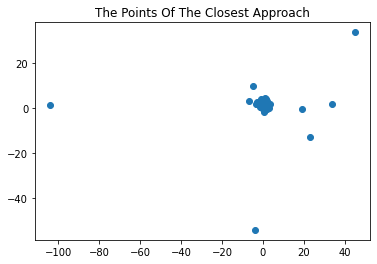

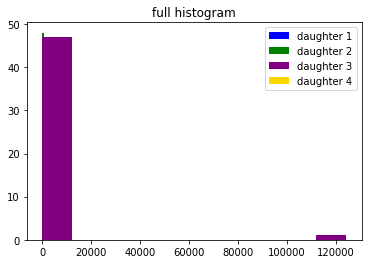


Statistics for Daughter 1
mean: 12.083497910088012
variance: 975.4550198367534
skewness: 3.5833360577290145
kurtosis: 13.324263999649997

Statistics for Daughter 2
mean: 161.93327258137842
variance: 837052.1375608136
skewness: 6.656819988415702
kurtosis: 42.8505649699645

Statistics for Daughter 3
mean: 2596.6412110530673
variance: 315344461.00483555
skewness: 6.709773653481783
kurtosis: 43.021136884593794

Statistics for Daughter 4
mean: 42.38558800074034
variance: 25519.994506750943
skewness: 4.304574192221169
kurtosis: 18.41737483179879


In [78]:
#task 3: C
#introduce the fourth particle, coming some distance away from the origin
#find the point of closest approach
chi_square(repetitions=50, null_activate=False, statistics=True, daughter_particles=4, assume_origin=False, dx=3, dy=2, daughter_ignore=False, chiovern=True, closest_approach=True)

Simulation run for:  4  particle(s) for:  50  repetition(s).

('Chi-square, daughter 1:', [0.0833333333333333, 499.5510204083904, 0.08791208791210539, 0.5365942690271942, 3.0030643513804933, 1.4982327613913335, 0.05993916571469016, 0.17555847568991542, 0.07018099726725054, 723.5061536065384, 441.0612244899965, 0.38945578231294453, 0.08843537414976291, 13.392857142863082, 1747.1734273961988, 0.742268041237414, 12.781276797066221, 0.10315526813653937, 0.1356634942292794, 0.3537414965986728, 0.49444727123837967, 0.16457601605620967, 0.5968204345069593, 0.5849975841523045, 0.0, 0.3510554440426887, 0.07083198505363386, 1.442591249698376, 6.419975992056659, 0.36774966076914223, 0.16939120631345153, 0.08235261540166665, 0.11596269611674333, 2.98002031370469, 0.30612244897965674, 0.08843537414967369, 7.326113570019369, 0.012753322838417068, 2.254355191078644, 0.8688278280933417, 5.50265698396353e-33, 0.0680272108843843, 360.5194123462375, 1.8800647843185168, 24.364779874215213, 219.64285714291

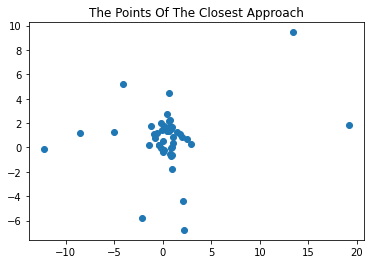

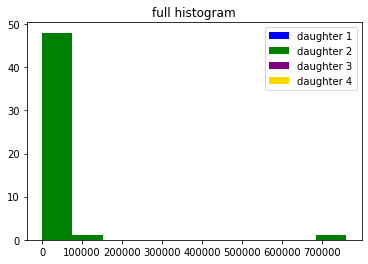


Statistics for Daughter 1
mean: 83.47146140985728
variance: 78739.44490638134
skewness: 4.60490707075612
kurtosis: 22.95026438147018

Statistics for Daughter 2
mean: 17833.70535678932
variance: 11522612058.401003
skewness: 6.649735128275572
kurtosis: 42.99677362370051

Statistics for Daughter 3
mean: 9.756939732134533
variance: 994.4157513659346
skewness: 4.4112919986039065
kurtosis: 19.10782206156988

Statistics for Daughter 4
mean: 56655.42064221273
variance: 145305408216.89297
skewness: 6.706536713729069
kurtosis: 42.992468081492405

Particle 1 ignored:
('Chi-square, daughter 2: ', [6.582508292823933, 0.3780267159411453, 0.07653061224506073, 9.197952864515443, 0.0680272108843841, 18.424917887589377, 1.265606933845605, 0.17467742404104586, 0.26123334366296297, 0.515529288013177, 0.1598595194719644, 0.07114510087950718, 0.2823129251701258, 1.8864893903796442, 0.12414965986397389, 0.014342662571029213, 0.06802721088438472, 0.24458328715508434, 0.44575969183389813, 0.12229210728131233,

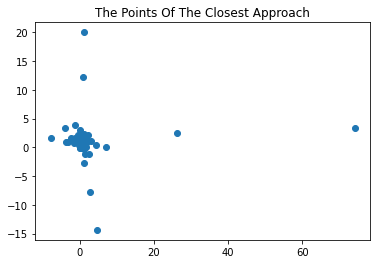

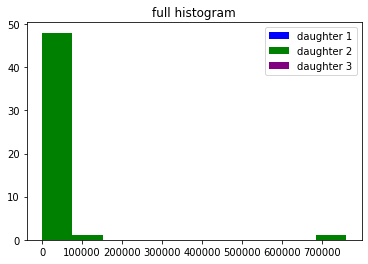


Statistics for Daughter 1
mean: 83.47146140985728
variance: 78739.44490638134
skewness: 4.60490707075612
kurtosis: 22.95026438147018

Statistics for Daughter 2
mean: 17833.70535678932
variance: 11522612058.401003
skewness: 6.649735128275572
kurtosis: 42.99677362370051

Statistics for Daughter 3
mean: 9.756939732134533
variance: 994.4157513659346
skewness: 4.4112919986039065
kurtosis: 19.10782206156988

Particle 2 ignored:
('Chi-square, daughter 1:', [0.0833333333333333, 499.5510204083904, 0.08791208791210539, 0.5365942690271942, 3.0030643513804933, 1.4982327613913335, 0.05993916571469016, 0.17555847568991542, 0.07018099726725054, 723.5061536065384, 441.0612244899965, 0.38945578231294453, 0.08843537414976291, 13.392857142863082, 1747.1734273961988, 0.742268041237414, 12.781276797066221, 0.10315526813653937, 0.1356634942292794, 0.3537414965986728, 0.49444727123837967, 0.16457601605620967, 0.5968204345069593, 0.5849975841523045, 0.0, 0.3510554440426887, 0.07083198505363386, 1.44259124969

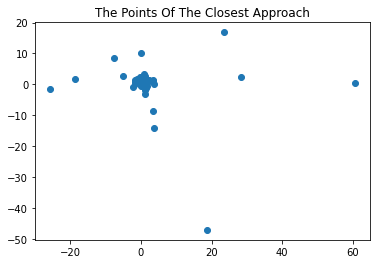

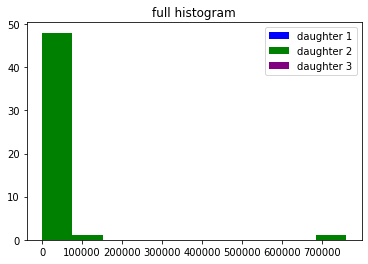


Statistics for Daughter 1
mean: 83.47146140985728
variance: 78739.44490638134
skewness: 4.60490707075612
kurtosis: 22.95026438147018

Statistics for Daughter 2
mean: 17833.70535678932
variance: 11522612058.401003
skewness: 6.649735128275572
kurtosis: 42.99677362370051

Statistics for Daughter 3
mean: 9.756939732134533
variance: 994.4157513659346
skewness: 4.4112919986039065
kurtosis: 19.10782206156988

Particle 3 ignored:
('Chi-square, daughter 1:', [0.0833333333333333, 499.5510204083904, 0.08791208791210539, 0.5365942690271942, 3.0030643513804933, 1.4982327613913335, 0.05993916571469016, 0.17555847568991542, 0.07018099726725054, 723.5061536065384, 441.0612244899965, 0.38945578231294453, 0.08843537414976291, 13.392857142863082, 1747.1734273961988, 0.742268041237414, 12.781276797066221, 0.10315526813653937, 0.1356634942292794, 0.3537414965986728, 0.49444727123837967, 0.16457601605620967, 0.5968204345069593, 0.5849975841523045, 0.0, 0.3510554440426887, 0.07083198505363386, 1.44259124969

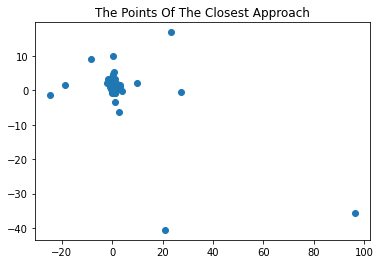

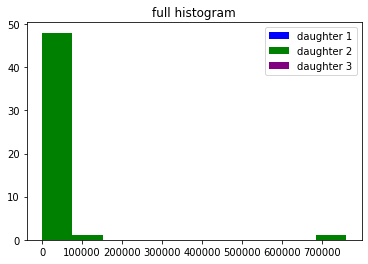


Statistics for Daughter 1
mean: 83.47146140985728
variance: 78739.44490638134
skewness: 4.60490707075612
kurtosis: 22.95026438147018

Statistics for Daughter 2
mean: 17833.70535678932
variance: 11522612058.401003
skewness: 6.649735128275572
kurtosis: 42.99677362370051

Statistics for Daughter 3
mean: 9.756939732134533
variance: 994.4157513659346
skewness: 4.4112919986039065
kurtosis: 19.10782206156988

Particle 4 ignored:
('Chi-square, daughter 1:', [0.0833333333333333, 499.5510204083904, 0.08791208791210539, 0.5365942690271942, 3.0030643513804933, 1.4982327613913335, 0.05993916571469016, 0.17555847568991542, 0.07018099726725054, 723.5061536065384, 441.0612244899965, 0.38945578231294453, 0.08843537414976291, 13.392857142863082, 1747.1734273961988, 0.742268041237414, 12.781276797066221, 0.10315526813653937, 0.1356634942292794, 0.3537414965986728, 0.49444727123837967, 0.16457601605620967, 0.5968204345069593, 0.5849975841523045, 0.0, 0.3510554440426887, 0.07083198505363386, 1.44259124969

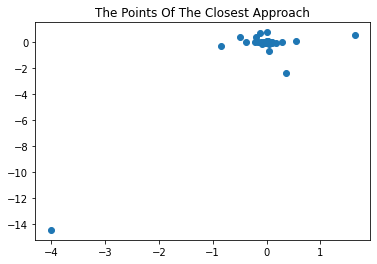

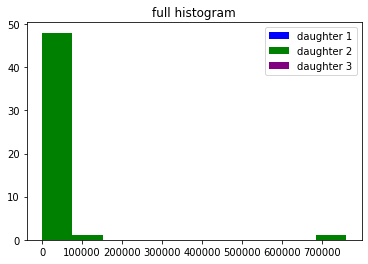


Statistics for Daughter 1
mean: 83.47146140985728
variance: 78739.44490638134
skewness: 4.60490707075612
kurtosis: 22.95026438147018

Statistics for Daughter 2
mean: 17833.70535678932
variance: 11522612058.401003
skewness: 6.649735128275572
kurtosis: 42.99677362370051

Statistics for Daughter 3
mean: 9.756939732134533
variance: 994.4157513659346
skewness: 4.4112919986039065
kurtosis: 19.10782206156988


In [79]:
#task 3: D
#generate 4 particles as above, but ignore 1 each run
chi_square(repetitions=50, null_activate=False, statistics=True, daughter_particles=4, assume_origin=False, dx=3, dy=2, daughter_ignore=True, chiovern=True, closest_approach=True)

In [0]:
#ADDITION: play with parameters